# SSH port analysis

Date: 03.05.2019

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
import matplotlib

In [4]:
conn = pd.read_csv('conn_1.log', sep='\t', skiprows=1, )

In [5]:
conn.columns = [
    "ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", 
    "id.resp_p", "proto", "service", "duration", "orig_bytes", 
    "resp_bytes", "conn_state", "local_orig", "local_resp", 
    "missed_bytes", "history", "orig_pkts", "orig_ip_bytes", 
    "resp_pkts", "resp_ip_bytes", "tunnel_parents"
]

In [6]:
features = conn[
    ['ts', 'id.orig_h', 'id.orig_p', 'id.resp_h', 
     'id.resp_p', 'proto', 'conn_state', 'orig_bytes']
]

In [7]:
conn.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
0,1.547066e+09,CAoLYw1bvhIw22qPu,192.168.1.194,53232,192.168.1.1,53,udp,dns,0.017988,53,...,SF,-,-,0,Dd,1,81,1,144,-
1,1.547066e+09,CwVjWI2d8vCupYi9Ja,192.168.1.194,53708,192.168.1.1,53,udp,dns,0.017239,52,...,SF,-,-,0,Dd,1,80,1,143,-
2,1.547066e+09,CXzdQI16WvbVzyqE1d,192.168.1.194,36419,192.168.1.1,53,udp,dns,0.018988,84,...,SF,-,-,0,Dd,2,140,2,260,-
3,1.547066e+09,Ckm3le2hnjluboqRce,192.168.1.194,39943,192.168.1.1,53,udp,dns,0.029489,74,...,SF,-,-,0,Dd,2,130,2,504,-
4,1.547066e+09,CDYPES1JPv7iU4HBu7,192.168.1.194,55433,192.168.1.1,53,udp,dns,0.002984,66,...,SF,-,-,0,Dd,2,122,2,166,-


In [8]:
port_stat = conn['id.resp_p'].value_counts()

In [9]:
port_stat

22      13594995
53           390
6667         285
123          108
0            101
1             73
13            70
80            18
3             12
443            6
10             5
Name: id.resp_p, dtype: int64

In [10]:
conn_22 = conn[conn['id.resp_p'] == 22]

In [11]:
conn_22.conn_state.value_counts()

S0      13594366
REJ          406
SF           122
RSTO          82
RSTR          15
S2             4
Name: conn_state, dtype: int64

In [30]:
conn_22_sf = conn_22[conn_22['conn_state'] == 'SF']

In [31]:
conn_22_sf.shape

(122, 22)

In [32]:
conn_22_sf.sort_values('orig_bytes', ascending=False)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,total_bytes
12901104,1.547067e+09,CDpYd21xKJGMautdse,192.168.1.194,50684,154.89.96.9,22,tcp,-,0.997685,42,...,-,-,0,ShADfFr,5,310,4,192,-,42
5800740,1.547068e+09,CU4noQO2RxcGsKeV8,192.168.1.194,56784,122.194.218.191,22,tcp,-,0.763813,42,...,-,-,0,ShADdfFa,5,310,4,232,-,54
5800741,1.547068e+09,CNiDec17qYe3RRTs9b,192.168.1.194,56786,122.194.218.191,22,tcp,-,0.766818,42,...,-,-,0,ShADdfFa,5,310,4,232,-,54
2800331,1.547067e+09,CRckeW2PPk68PEhByf,192.168.1.194,53058,200.0.111.124,22,tcp,-,0.473459,42,...,-,-,0,ShADfrFr,4,258,4,192,-,42
1100167,1.547066e+09,CzEoJPoqBizqlvW4c,192.168.1.194,46124,154.85.55.122,22,tcp,-,0.299810,42,...,-,-,0,ShADfrFr,4,258,4,192,-,42
12901105,1.547067e+09,CCzNMm1p4WxOtyIiwd,192.168.1.194,50686,154.89.96.9,22,tcp,-,0.987439,42,...,-,-,0,ShADfFr,5,310,4,192,-,42
8676356,1.547069e+09,CmK3EusiUx7ZDtqE9,192.168.1.194,44452,81.101.97.162,22,tcp,ssh,23.113068,2962,...,-,-,0,ShADadFf,21,4062,18,2578,-,4596
8676678,1.547069e+09,C7vC2h3nmvX16Ql51j,192.168.1.194,44450,81.101.97.162,22,tcp,ssh,23.180785,2962,...,-,-,0,ShADadFf,21,4062,18,2578,-,4596
11000963,1.547070e+09,CS4AMwNB1fXAaWaVb,192.168.1.194,56466,70.118.109.138,22,tcp,ssh,6.989999,2822,...,-,-,0,ShADadtFf,17,3726,17,4366,-,6296
11000962,1.547070e+09,CjmS231eJ9TFEYD2D3,192.168.1.194,56464,70.118.109.138,22,tcp,ssh,6.937513,2822,...,-,-,0,ShADadtFf,17,3726,17,4366,-,6296


In [33]:
conn_22_sf['total_bytes'] = conn_22_sf.orig_bytes.apply(int) + conn_22_sf.resp_bytes.apply(int)

/Users/alperovich/miniconda3/envs/my_base_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
conn_22_sf.sort_values('duration', ascending=False)[['id.resp_h', 'duration', 'total_bytes']]

,id.resp_h,duration,total_bytes
700134,162.144.39.115,9.921596,4575
700133,162.144.39.115,9.715712,4575
2200278,49.70.106.183,7.830796,3817
2200277,49.70.106.183,7.796565,3881
7000801,204.191.85.246,7.456748,4163
11000963,70.118.109.138,6.989999,6296
11000962,70.118.109.138,6.937513,6296
10800956,27.254.152.195,6.882308,3881
10800955,27.254.152.195,6.373103,3945
7000799,204.191.85.246,6.312400,4163


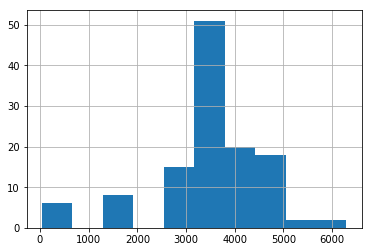

In [17]:
conn_22_sf.total_bytes.hist()

In [18]:
def get_bytes(x):
    return int(x) if x is not '-' else 0

In [19]:
conn['total_bytes'] = conn.orig_bytes.apply(get_bytes) + conn.resp_bytes.apply(get_bytes)

In [20]:
conn_22 = conn[conn['id.resp_p'] == 22]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cdf6c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e06d278>]], dtype=object)

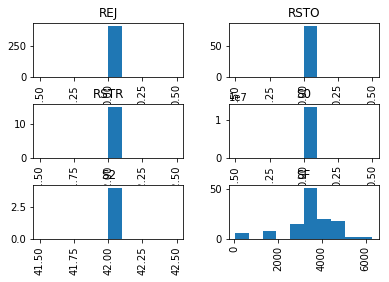

In [21]:
conn_22['total_bytes'].hist(by=conn_22['conn_state'])

In [22]:
data = conn_22[['total_bytes', 'conn_state']]

In [26]:
data = data[data.total_bytes != 0]

In [27]:
data.shape

(141, 2)